# Seaborn

In [22]:
import seaborn as sns
import pandas as pd
import numpy as np

O Seaborn tem dois tipos de funções. O primeiro corresponde às funções que trabalham nos eixos e que são de mais baixo nível, como a barplot(). Nesse caso, é possível configurar manualmente a figura que será gerada, para, em seguida, plotar o gráfico nesta figura.

Porém, existem funções que não funcionam nos eixos de uma imagem configurada previamente, mas sim em uma caracterizada automaticamente pelo próprio Seaborn. E adivinhe: a catplot() faz parte deste segundo tipo, já que é uma função de mais alto nível e que, inclusive, chama outra função (acatplot()) no processo.

# 0 - Dados

In [4]:
tmdb = pd.read_csv("tmdb_5000_movies.csv")
tmdb.head(2)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500


In [6]:
total_por_lingua = tmdb["original_language"].value_counts()
total_geral = total_por_lingua.sum()
total_de_ingles = total_por_lingua.loc["en"]
total_do_resto = total_geral - total_de_ingles

In [26]:
penguins = sns.load_dataset("penguins")

In [32]:
notas = pd.read_csv('ratings.csv')
notas.columns = ["usuarioId", "filmeId", "nota", "momento"]
notas.head()

,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


# 1 - Gráfico categórico

O atributo **kind** recebe o valor **count** para contar as categoria no conjunto de dados

In [19]:
filmes_sem_lingua_original_em_ingles = tmdb.query("original_language != 'en'")
total_por_lingua_de_outros_filmes = filmes_sem_lingua_original_em_ingles.original_language.value_counts()
total_por_lingua_de_outros_filmes.head()

fr    70
es    32
zh    27
de    27
hi    19
Name: original_language, dtype: int64

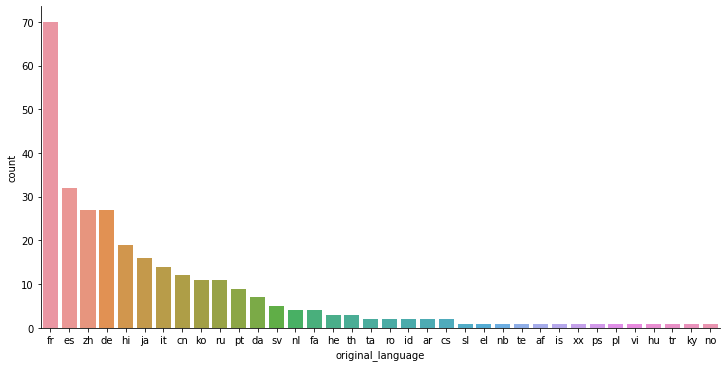

In [20]:
sns.catplot(x = "original_language", data = filmes_sem_lingua_original_em_ingles, 
            kind="count", 
            aspect=2,
            order = total_por_lingua_de_outros_filmes.index)

# 2 - Barra ou coluna

<AxesSubplot:xlabel='lingua', ylabel='total'>

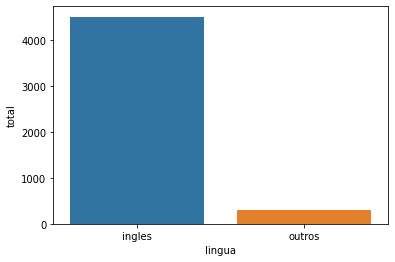

In [7]:
dados = {
    'lingua' : ['ingles','outros'],
    'total' : [total_de_ingles, total_do_resto]
}
dados = pd.DataFrame(dados)

sns.barplot(x="lingua", y="total", data = dados)

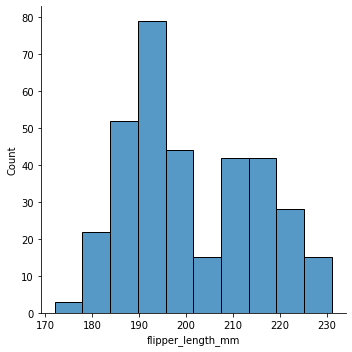

In [27]:
sns.displot(data=penguins, x="flipper_length_mm")

## 2.1 Kde

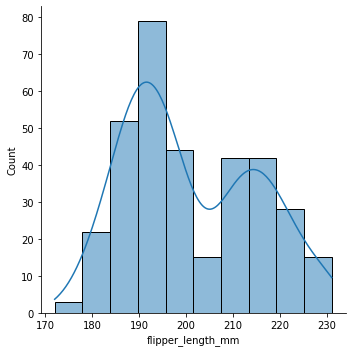

In [29]:
sns.displot(data=penguins, x="flipper_length_mm", kde=True)

# 3 Boxplot

<AxesSubplot:>

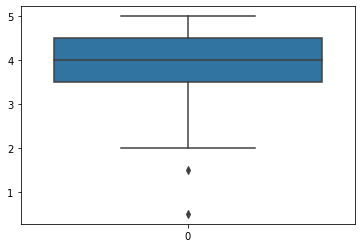

In [37]:
sns.boxplot(data=notas.query("filmeId == 1").nota)

<AxesSubplot:xlabel='filmeId', ylabel='nota'>

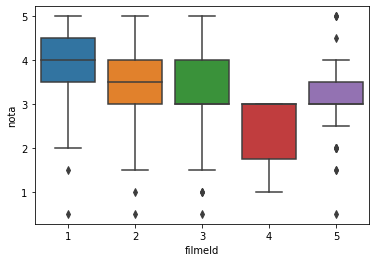

In [33]:
sns.boxplot(x = "filmeId", y = "nota", data = notas.query("filmeId in [1,2,3,4,5]"))